# 프로그래밍3 기말 프로젝트

소프트웨어응용학부 201904026 김수미

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
telco = pd.read_csv('data/telco.csv')

In [3]:
telco.head(15)

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2


In [4]:
telco.shape

(3333, 11)

In [5]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Leave        3333 non-null   int64  
 1   MemberWeeks  3333 non-null   int64  
 2   NewContract  3333 non-null   int64  
 3   IsData       3333 non-null   int64  
 4   DataAmount   3333 non-null   float64
 5   Callcenter   3333 non-null   int64  
 6   CalMins      3333 non-null   float64
 7   CalCounts    3333 non-null   int64  
 8   MonthlyFee   3333 non-null   float64
 9   OverFee      3333 non-null   float64
 10  RoamingMin   3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [6]:
telco.describe().T

,count,mean,std,min,25%,50%,75%,max
Leave,3333.0,0.144914,0.352067,0.0,0.00,0.00,0.00,1.00
MemberWeeks,3333.0,101.064806,39.822106,1.0,74.00,101.00,127.00,243.00
NewContract,3333.0,0.903090,0.295879,0.0,1.00,1.00,1.00,1.00
IsData,3333.0,0.276628,0.447398,0.0,0.00,0.00,1.00,1.00
DataAmount,3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
Callcenter,3333.0,1.562856,1.315491,0.0,1.00,1.00,2.00,9.00
CalMins,3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
CalCounts,3333.0,100.435644,20.069084,0.0,87.00,101.00,114.00,165.00
MonthlyFee,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
OverFee,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19


In [7]:
telco.isnull().sum().sum()

0

### 1. 가입기간에 따른 가입해지여부와 가입갱신여부 비교

In [8]:
telco2 = (
telco[['MemberWeeks', 'Leave', 'NewContract']]
.sort_values('MemberWeeks', ascending=True))

In [9]:
telco2

,MemberWeeks,Leave,NewContract
923,1,0,1
1838,1,0,1
1490,1,0,1
2960,1,1,1
2423,1,0,1
...,...,...,...
1886,224,0,1
1751,225,0,1
1551,225,1,1
1408,232,0,1


In [10]:
Mw1 = telco.MemberWeeks <= 50

In [11]:
telco3 = telco2[Mw1]

<ipython-input-11-974db8e5aa65>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  telco3 = telco2[Mw1]


In [12]:
telco3

,MemberWeeks,Leave,NewContract
923,1,0,1
1838,1,0,1
1490,1,0,1
2960,1,1,1
2423,1,0,1
...,...,...,...
1707,50,1,1
1830,50,0,1
2721,50,0,1
980,50,0,1


In [13]:
telco3['MemberWeeks'] = '1~50'

<ipython-input-13-e93f9c2afae9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telco3['MemberWeeks'] = '1~50'


In [14]:
telco3

,MemberWeeks,Leave,NewContract
923,1~50,0,1
1838,1~50,0,1
1490,1~50,0,1
2960,1~50,1,1
2423,1~50,0,1
...,...,...,...
1707,1~50,1,1
1830,1~50,0,1
2721,1~50,0,1
980,1~50,0,1


In [15]:
Mw2 = (telco.MemberWeeks > 50) & (telco.MemberWeeks <= 100)

In [16]:
telco4 = telco2[Mw2]

<ipython-input-16-ae7103a9140d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  telco4 = telco2[Mw2]


In [17]:
telco4

,MemberWeeks,Leave,NewContract
3175,51,0,1
421,51,0,1
247,51,0,1
2042,51,0,1
3076,51,0,1
...,...,...,...
3171,100,0,1
1131,100,0,1
833,100,0,1
437,100,1,1


In [18]:
telco4['MemberWeeks'] = '51~100'

<ipython-input-18-6a94aaba3c43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telco4['MemberWeeks'] = '51~100'


In [19]:
telco4

,MemberWeeks,Leave,NewContract
3175,51~100,0,1
421,51~100,0,1
247,51~100,0,1
2042,51~100,0,1
3076,51~100,0,1
...,...,...,...
3171,51~100,0,1
1131,51~100,0,1
833,51~100,0,1
437,51~100,1,1


In [20]:
Mw3 = (telco.MemberWeeks > 100) & (telco.MemberWeeks <= 150)

In [21]:
telco5 = telco2[Mw3]

<ipython-input-21-405e13e2c6d3>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  telco5 = telco2[Mw3]


In [22]:
telco5

,MemberWeeks,Leave,NewContract
1803,101,0,1
1815,101,0,1
751,101,0,1
2056,101,0,1
2739,101,0,1
...,...,...,...
1040,150,0,1
541,150,0,1
947,150,0,1
819,150,0,1


In [23]:
telco5['MemberWeeks'] = '101~150'

<ipython-input-23-32ed7bccb93f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telco5['MemberWeeks'] = '101~150'


In [24]:
telco5

,MemberWeeks,Leave,NewContract
1803,101~150,0,1
1815,101~150,0,1
751,101~150,0,1
2056,101~150,0,1
2739,101~150,0,1
...,...,...,...
1040,101~150,0,1
541,101~150,0,1
947,101~150,0,1
819,101~150,0,1


In [25]:
Mw4 = (telco.MemberWeeks > 150) & (telco.MemberWeeks <= 200)

In [26]:
telco6 = telco2[Mw4]

<ipython-input-26-b530deb0b504>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  telco6 = telco2[Mw4]


In [27]:
telco6['MemberWeeks'] = '151~200'

<ipython-input-27-ea03468bfe63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telco6['MemberWeeks'] = '151~200'


In [28]:
telco6

,MemberWeeks,Leave,NewContract
155,151~200,0,1
2791,151~200,0,1
729,151~200,0,1
335,151~200,0,1
1108,151~200,0,1
...,...,...,...
1529,151~200,0,1
1662,151~200,1,0
2661,151~200,0,1
290,151~200,0,1


In [29]:
Mw5 = (telco.MemberWeeks > 151) & (telco.MemberWeeks <= 300)

In [30]:
telco7 = telco2[Mw5]

<ipython-input-30-34af4c5b4597>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  telco7 = telco2[Mw5]


In [31]:
telco7

,MemberWeeks,Leave,NewContract
2468,152,1,0
542,152,1,0
3199,152,0,1
663,152,0,1
2702,152,0,1
...,...,...,...
1886,224,0,1
1751,225,0,1
1551,225,1,1
1408,232,0,1


In [32]:
telco7['MemberWeeks'] = '201~250'

<ipython-input-32-64a68cec3fb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telco7['MemberWeeks'] = '201~250'


In [33]:
telco7

,MemberWeeks,Leave,NewContract
2468,201~250,1,0
542,201~250,1,0
3199,201~250,0,1
663,201~250,0,1
2702,201~250,0,1
...,...,...,...
1886,201~250,0,1
1751,201~250,0,1
1551,201~250,1,1
1408,201~250,0,1


In [34]:
telcos = pd.concat([telco3, telco4, telco5, telco6, telco7])

In [35]:
telcos

,MemberWeeks,Leave,NewContract
923,1~50,0,1
1838,1~50,0,1
1490,1~50,0,1
2960,1~50,1,1
2423,1~50,0,1
...,...,...,...
1886,201~250,0,1
1751,201~250,0,1
1551,201~250,1,1
1408,201~250,0,1


In [36]:
telcos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3651 entries, 923 to 817
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MemberWeeks  3651 non-null   object
 1   Leave        3651 non-null   int64 
 2   NewContract  3651 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 114.1+ KB


<AxesSubplot:xlabel='MemberWeeks', ylabel='count'>

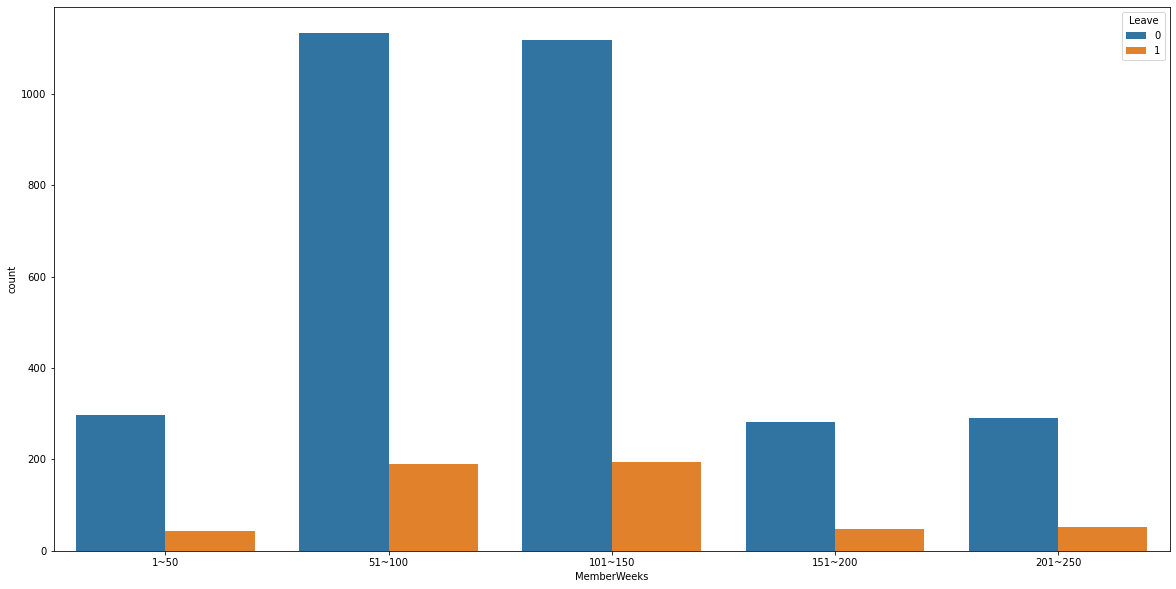

In [37]:
ig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x='MemberWeeks',hue='Leave',
 data=(telcos))

<AxesSubplot:xlabel='MemberWeeks', ylabel='count'>

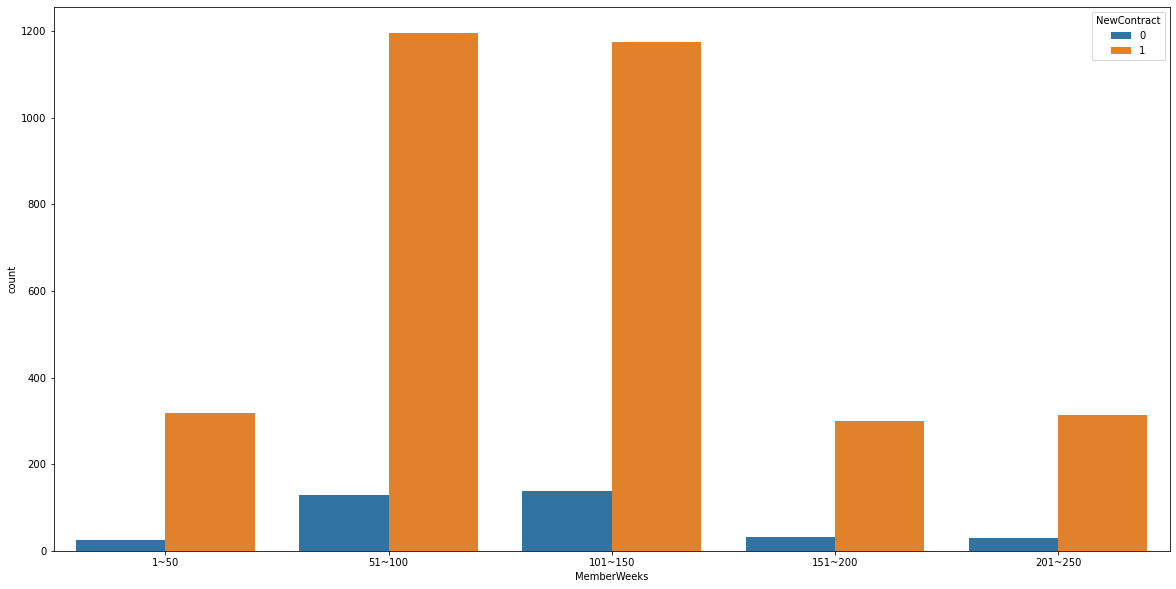

In [38]:
ig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x='MemberWeeks',hue='NewContract',
 data=(telcos))

<AxesSubplot:xlabel='MemberWeeks'>

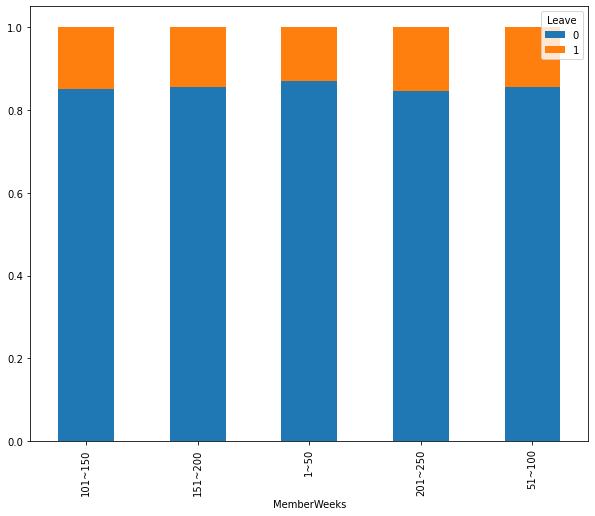

In [39]:
fig, ax = plt.subplots(figsize=(10, 8))
(
 telcos.pipe(
 lambda telcos: pd.crosstab(telcos.MemberWeeks, telcos.Leave)
 )
 .pipe(lambda telcos: telcos.div(telcos.sum(axis=1), axis=0))
 .plot.bar(stacked=True, ax=ax)
)

<AxesSubplot:xlabel='MemberWeeks'>

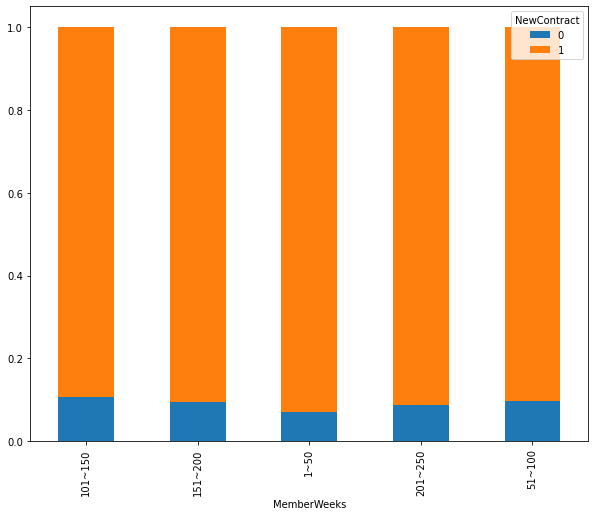

In [40]:
fig, ax = plt.subplots(figsize=(10, 8))
(
 telcos.pipe(
 lambda telcos: pd.crosstab(telcos.MemberWeeks, telcos.NewContract)
 )
 .pipe(lambda telcos: telcos.div(telcos.sum(axis=1), axis=0))
 .plot.bar(stacked=True, ax=ax)
)

## 2. 데이터사용량과 초과요금의 관계

In [41]:
telco.head()

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [42]:
telcos2 = telco.loc[:,['DataAmount', 'OverFee']]

In [43]:
telcos2

,DataAmount,OverFee
0,2.70,9.87
1,3.70,9.78
2,0.00,6.06
3,0.00,3.10
4,0.00,7.42
...,...,...
3328,2.67,10.78
3329,0.34,7.67
3330,0.00,14.44
3331,0.00,7.98


In [44]:
telcos2.DataAmount.corr(telcos2.OverFee)

0.019637371523952236

<AxesSubplot:>

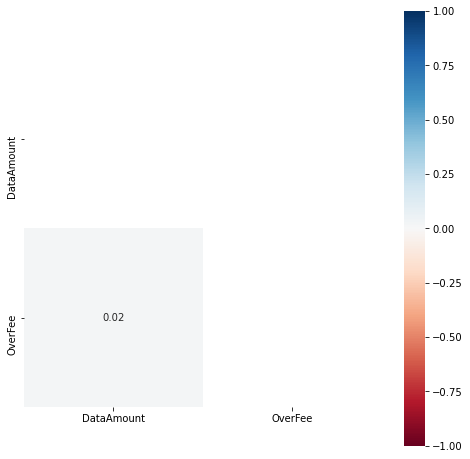

In [45]:
fig, ax = plt.subplots(figsize=(8, 8))
corr = telcos2[['DataAmount', 'OverFee']].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(
 corr,
 mask=mask,
 fmt='.2f',
 annot=True,
 ax=ax,
 cmap='RdBu',
 vmin=-1,
 vmax=1,
 square=True
)

<AxesSubplot:xlabel='DataAmount', ylabel='OverFee'>

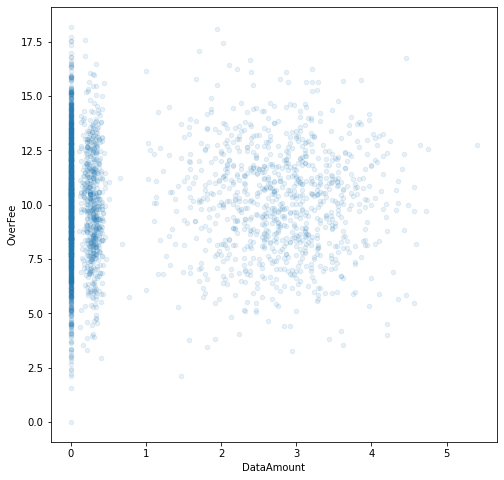

In [46]:
fig, ax = plt.subplots(figsize=(8, 8))
telcos2.plot.scatter(
 x='DataAmount', y='OverFee', alpha=.1, ax=ax)

## 3. 데이터 사용량과 월평균요금의 관계

In [47]:
telcos3 = telco.loc[:,['DataAmount', 'MonthlyFee']]

In [48]:
telcos3

,DataAmount,MonthlyFee
0,2.70,89.0
1,3.70,82.0
2,0.00,52.0
3,0.00,57.0
4,0.00,41.0
...,...,...
3328,2.67,71.7
3329,0.34,56.4
3330,0.00,56.0
3331,0.00,50.0


In [49]:
telcos3.DataAmount.corr(telcos3.MonthlyFee)

0.7816604290749414

<AxesSubplot:>

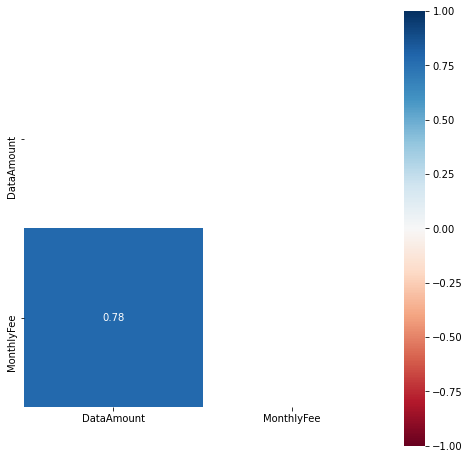

In [50]:
fig, ax = plt.subplots(figsize=(8, 8))
corr = telcos3[['DataAmount', 'MonthlyFee']].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(
 corr,
 mask=mask,
 fmt='.2f',
 annot=True,
 ax=ax,
 cmap='RdBu',
 vmin=-1,
 vmax=1,
 square=True
)

<AxesSubplot:xlabel='DataAmount', ylabel='MonthlyFee'>

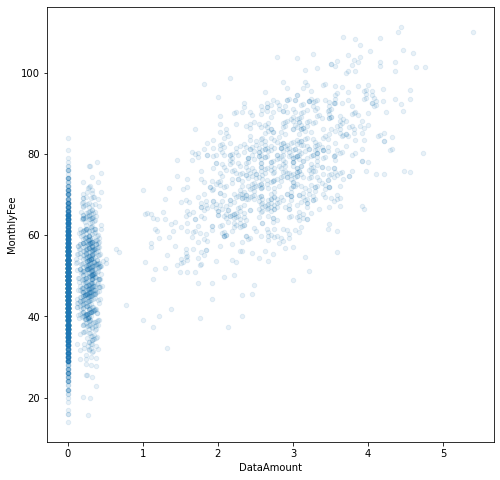

In [51]:
fig, ax = plt.subplots(figsize=(8, 8))
telcos3.plot.scatter(
 x='DataAmount', y='MonthlyFee', alpha=.1, ax=ax)

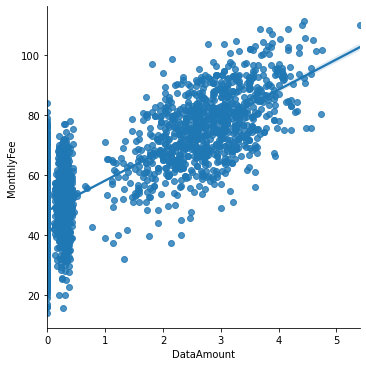

In [52]:
res=sns.lmplot(
    x='DataAmount', y='MonthlyFee', data=telcos3)

## 4. 월평균전화량(횟수)와 월평균전화량(분)의 관계

In [53]:
telcos4 = telco.loc[:,['CalMins', 'CalCounts']]

In [54]:
telcos4

,CalMins,CalCounts
0,265.1,110
1,161.6,123
2,243.4,114
3,299.4,71
4,166.7,113
...,...,...
3328,156.2,77
3329,231.1,57
3330,180.8,109
3331,213.8,105


In [55]:
telcos4.CalMins.corr(telcos4.CalCounts)

0.006750413879729785

<AxesSubplot:>

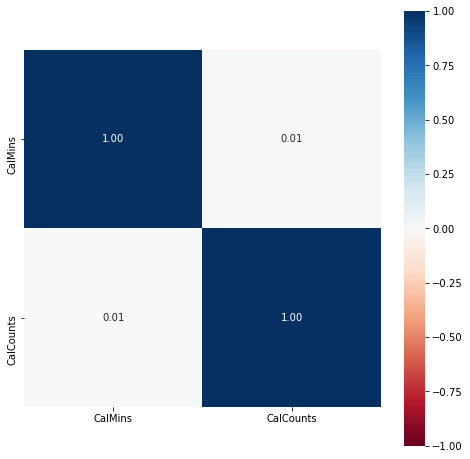

In [56]:
fig, ax = plt.subplots(figsize=(8, 8))
corr = telcos4[['CalMins', 'CalCounts']].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(
 corr,
 fmt='.2f',
 annot=True,
 ax=ax,
 cmap='RdBu',
 vmin=-1,
 vmax=1,
 square=True
)


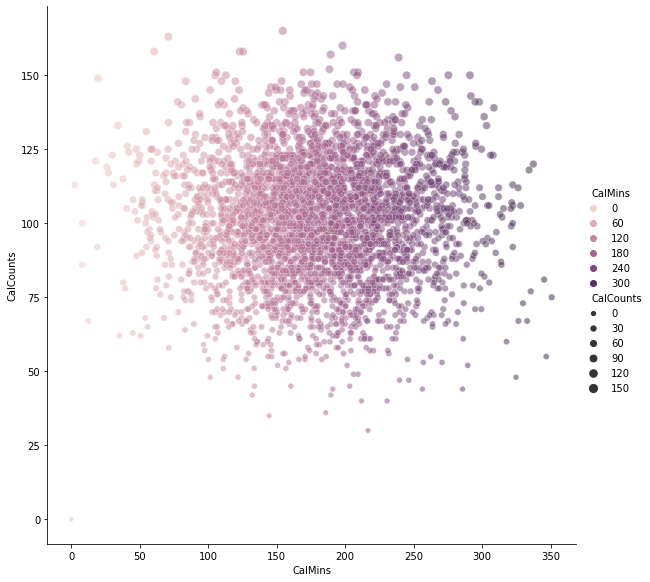

In [57]:
sns.relplot(x='CalMins', y='CalCounts',
          data=telcos4,
          hue='CalMins', size='CalCounts', alpha=.5, height=8)

## 5. 초과요금과 로밍시간의 관계

In [58]:
telcos5 = telco.iloc[:,[9,10]]

In [59]:
telcos5

,OverFee,RoamingMin
0,9.87,10.0
1,9.78,13.7
2,6.06,12.2
3,3.10,6.6
4,7.42,10.1
...,...,...
3328,10.78,9.9
3329,7.67,9.6
3330,14.44,14.1
3331,7.98,5.0


In [60]:
telcos5.OverFee.corr(telcos5.RoamingMin)

-0.011023335554298854

<AxesSubplot:xlabel='RoamingMin', ylabel='Count'>

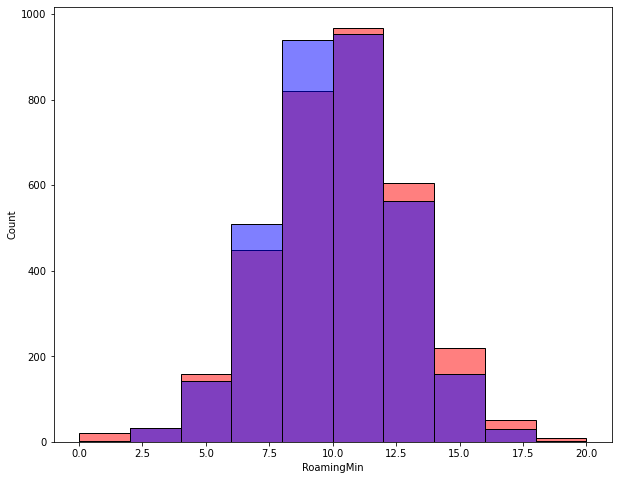

In [61]:
fig, ax = plt.subplots(figsize=(10,8))

sns.histplot(telcos5.RoamingMin, ax=ax, binwidth=2, color = 'red', alpha=0.5)
sns.histplot(telcos5.OverFee, ax=ax, binwidth=2, color = 'blue', alpha=0.5)


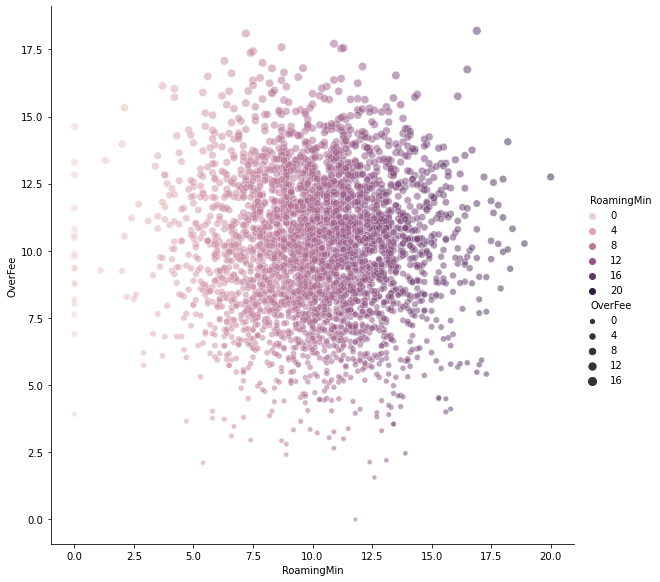

In [62]:
sns.relplot(x='RoamingMin', y='OverFee',
          data=telcos5,
          hue='RoamingMin', size='OverFee', alpha=.5, height=8)

## 6. 의미해석

### 1. 가입 기간이 길수록 가입갱신 여부가 많고 중간기간에 해지 여부가 가장 많으리라 생각했다.
- 중간 부분인 51~150주 구간에서 해지하는 유저가 많은 것을 알 수 있었고 그만큼 갱신하는 유저도 많은 것을 알 수 있었다.
- 51~150주 구간에 갱신이나 해지를 많이 하는 것을 알 수 있다. 보통 약정기간이 2년이기 때문이다.
- 전체적으로 봤을 때도 가입을 해지하는 유저와 갱신하는 유저들이 많은 것으로 보아 기기 변경하는 유저와 갱신하는 유저의 비율이 비슷한 것을 알 수 있다.
- 기기 변경하는 유저들의 분포도 비슷할 것으로 생각해 전체 통신사 유저 비율을 매년 비슷하리라 생각된다.

### 2. 데이터 사용량이 많은 사람일수록 많이 사용해서 초과요금을 많이 낼 것으로 생각했다.
- 상관관계 그래프를 보면 상관관계가 매우 약한 것을 확인할 수 있고, 산포도 그래프를 보면 골고루 중앙에 분포하고 있는 것을 확인할 수 있다.
- 데이터 사용량과 상관없이 7.5 - 12.5 사이에 많이 분포되어있는 것을 알 수 있다.

### 3. 데이터 사용량이 많은 사람일수록 데이터를 많이 사용하기 때문에 월 평균요금이 더 높을 거라고 생각했다.
- 상관관계 그래프와 산포도 그래프를 보면 양의 관계를 맺고 있는 것을 확인할 수 있다.
- 데이터 사용량이 많을수록 월평균 요금이 높다.

### 4. 월평균 전화량(횟수)과 월평균 전화량(분)의 관계는 양의 상관관계를 가지고 있을 거라고 생각했다.
- 상관관계 그래프를 보면 매우 약한 상관관계를 가진 것을 확인할 수 있고, 중앙에 골고루 분포되어있는 것을 알 수 있다.
- 75 ~ 125번 150~200분에 가장 많은 분포를 띄고 있는 것을 확인할 수 있다.

### 5. 로밍할 때 추가 요금이 더 들기 때문에 로밍 시간이 길수록 초과요금을 더 낼 거라고 생각했다.
-  하지만 약한 상관관계를 가지고 있다는 것을 알 수 있었다.
- 중앙에 대부분 분포되어있는 것을 그래프를 통해 알 수 있었다.

<br>

약한 상관관계를 가지고 있던 것들은 대부분 중앙값에 많은 값들이 분포되어있는 것을 확인할 수 있었다.